In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [20]:
dataset_train = pd.read_csv("trainset.csv")

In [21]:
dataset_train.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [22]:
trainset = dataset_train.iloc[:, 1:2].values

In [25]:
trainset[:5]

array([[357.385559],
       [360.122742],
       [362.313507],
       [365.348755],
       [365.393463]])

In [28]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [29]:
training_scaled[:5]

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       [0.02109298],
       [0.02115463]])

In [35]:
x_train = []
y_train = []

In [36]:
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [37]:
x_train.shape

(1199, 60)

In [38]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [42]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [43]:
regressor.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_12 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_14 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_13 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_15 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_14 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_16 (LSTM)              (None, 50)               

In [44]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [45]:
regressor.fit(x_train, y_train,epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 17s 166ms/step - loss: 0.0329
Epoch 2/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0039
Epoch 3/100
38/38 [==============================] - 7s 194ms/step - loss: 0.0040
Epoch 4/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0036
Epoch 5/100
38/38 [==============================] - 6s 169ms/step - loss: 0.0035
Epoch 6/100
38/38 [==============================] - 9s 240ms/step - loss: 0.0040
Epoch 7/100
38/38 [==============================] - 8s 203ms/step - loss: 0.0039
Epoch 8/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0032
Epoch 9/100
38/38 [==============================] - 9s 239ms/step - loss: 0.0028
Epoch 10/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0036
Epoch 11/100
38/38 [==============================] - 7s 196ms/step - loss: 0.0032
Epoch 12/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0028
Epoch 13/100

In [46]:
dataset_test = pd.read_csv("testset.csv")

In [47]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [48]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [49]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [50]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [51]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

x_test = np.array(x_test)
x_test.shape

(125, 60)

In [52]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [53]:
predicted_price = regressor.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

4/4 [==============================] - 2s 37ms/step


array([[1052.4279],
       [1050.8287],
       [1052.5302],
       [1059.9318],
       [1070.6041],
       [1081.3812],
       [1090.2233],
       [1094.0156],
       [1094.8312],
       [1094.0156],
       [1097.2748],
       [1103.0132],
       [1109.3981],
       [1114.592 ],
       [1118.6245],
       [1124.6046],
       [1133.9406],
       [1142.9906],
       [1149.591 ],
       [1153.3746],
       [1153.8256],
       [1152.904 ],
       [1151.0845],
       [1143.927 ],
       [1130.0553],
       [1106.4535],
       [1088.0912],
       [1077.204 ],
       [1067.8739],
       [1063.1882],
       [1062.3495],
       [1063.7626],
       [1069.4648],
       [1077.989 ],
       [1085.8636],
       [1092.7734],
       [1098.9044],
       [1102.8531],
       [1106.5645],
       [1111.9436],
       [1115.2432],
       [1113.783 ],
       [1101.9633],
       [1088.2582],
       [1082.0876],
       [1082.884 ],
       [1090.8126],
       [1104.0094],
       [1120.7734],
       [1136.3044],


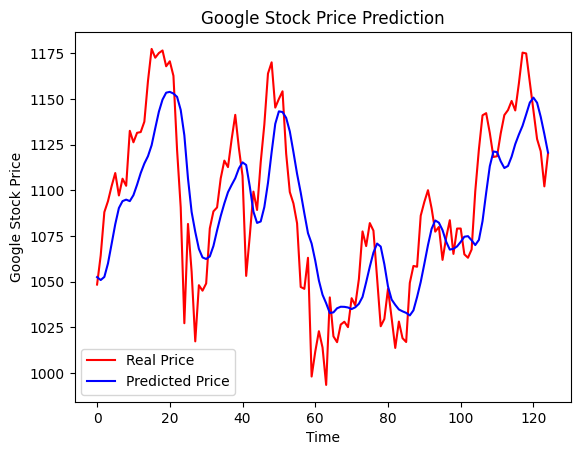

In [54]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()